# Twitter Sentiment Analysis

The data was extracted from Twitter using our APIs. Hashtag used was 'JohnnyDepp'

### Install Dependencies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import nltk
import re
from textblob import TextBlob
from textblob import Word, Blobber
from collections import Counter
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Import and Read the data. Basic EDA

In [2]:
df = pd.read_csv('tweets.csv')

In [3]:
df

Unnamed: 0         username  \
0              0  CatherineRigb15   
1              1  TruthWeaponized   
2              2   MaloodaFalooda   
3              3        kimkayku3   
4              4        momofkami   
...          ...              ...   
1995        1995    justicefanacc   
1996        1996      SoberBlanco   
1997        1997        terri0928   
1998        1998    maria59066147   
1999        1999         hydeedee   

                                            description  \
0                                                   NaN   
1     Proud to be blocked by Michele Dauber for tell...   
2                                                   NaN   
3                                                   NaN   
4     #Tennessee #democrat #retailworker #Mom #BSW #...   
...                                                 ...   
1995  MSc Psychology postgrad, queer feminist, autis...   
1996  Web Designer @sober_agency | Premium Customize...   
1997   Lifetime Fan of Truth and Justice For ALL People   
1998                                                NaN   
1999  Rocking my 60's 🥰 loving my life. mad cat woma...   

                      location  following  followers  totaltweets  \
0                          NaN         53         11          318   
1                          NaN          6         15         1111   
2                          NaN        434        163         8865   
3                       Zambia       1182       1476        19744   
4     Tennessee, United States       1725        345        11244   
...                        ...        ...        ...          ...   
1995                       NaN        132         41          760   
1996                       NaN       3297       5836        33934   
1997                       NaN         52         27         1975   
1998                       NaN        188         27         2980   
1999            United Kingdom        576        352         5377   

      retweetcount  
0              787  
1                0  
2                2  
3              317  
4               81  
...            ...  
1995           293  
1996             4  
1997           787  
1998           265  
1999             4  

[2000 rows x 8 columns]

In [4]:
#removing rows which have blank tweets
df = df[df['description'].notna()]

In [5]:
df.count()

Unnamed: 0      1503
username        1503
description     1503
location         912
following       1503
followers       1503
totaltweets     1503
retweetcount    1503
dtype: int64

In [6]:
#removing the first column as its unneccessary
df = df.drop(df.columns[0],axis=1)

In [7]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

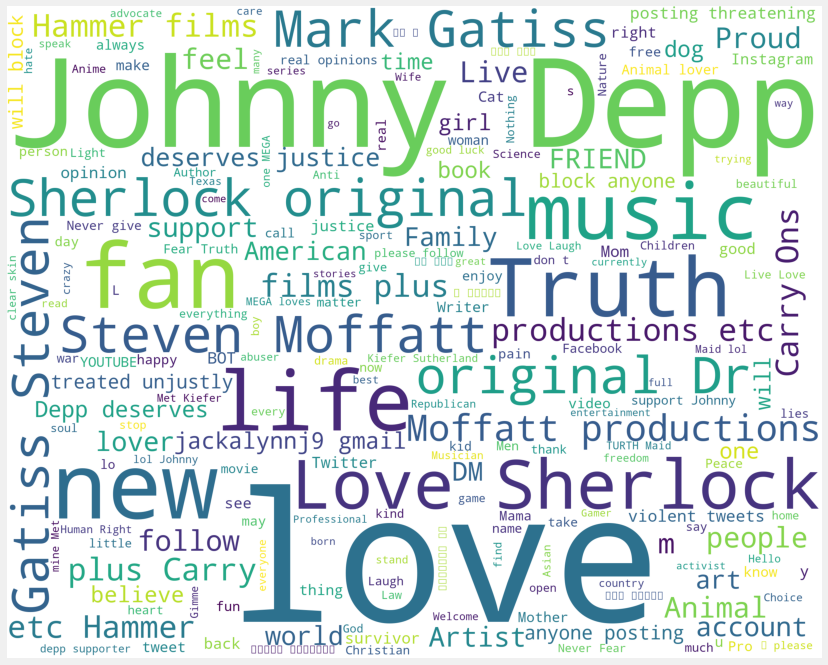

In [8]:
#wordcloud of all the words pre-cleaning
wordcloud_draw(df['description'], color='white')

<AxesSubplot:xlabel='count', ylabel='location'>

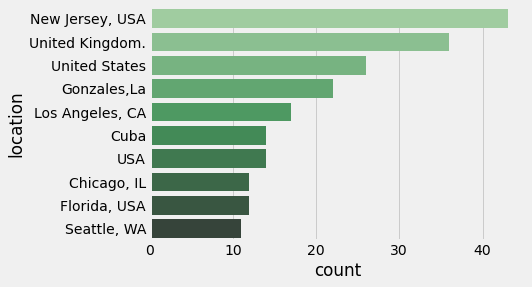

In [9]:
##viewing locations from where most tweets originate from
sns.countplot(y="location", data=df, palette="Greens_d",
              order=df.location.value_counts().iloc[:10].index)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 1 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   username      1503 non-null   object
 1   description   1503 non-null   object
 2   location      912 non-null    object
 3   following     1503 non-null   int64 
 4   followers     1503 non-null   int64 
 5   totaltweets   1503 non-null   int64 
 6   retweetcount  1503 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 126.2+ KB


In [11]:
##converting to str for easier processsing
df['username'] = df['username'].astype(str)
df['description'] = df['description'].astype(str)
df['location'] = df['location'].astype(str)

### Cleaning the textual data

In [12]:
def cleantwt(twt):
    twt = re.sub('#johnnydepp', 'johnnydepp', twt)#proper noun processing
    twt = re.sub('#JohnnyDepp', 'johnnydepp', twt)#proper noun processing
    twt = re.sub('#Johnnydepp', 'johnnydepp', twt)#proper noun processing
    twt = re.sub('[^\x00-\x7f]','', twt) #remove non-ascii/english characters
    twt = re.sub('#[A-Za-z0-9]+', '', twt)#remove single letters or digits or special characters
    twt = re.sub('\\n', '', twt)
    twt = re.sub('https?:\/\/\S+', '', twt)#removes links
    txt = re.sub("(<br/>)", "",twt)
    txt = re.sub('(<a).*(>).*(</a>)', '',twt)
    return twt

In [13]:
df['clean_tweets'] = df['description'].apply(cleantwt)

In [14]:
##convert all characters to lower case
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
# As you can see nearly all special characters have been removed and all are in lowercase
# However we still have to remove punctuation like apostrophe ' or quotes " or commas etc.
# We use the command replace (^\w\s) which is for all punctuation
df['clean_tweets'] = df['clean_tweets'].str.replace('[^\w\s]', ' ')

/var/folders/p7/6vf9gsks0hx17q4259m6s9640000gn/T/ipykernel_1822/2667820976.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweets'] = df['clean_tweets'].str.replace('[^\w\s]', ' ')


In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/philipnj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
##remove stopwords
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/philipnj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
#lemmitizer
from nltk.stem import WordNetLemmatizer
lt = WordNetLemmatizer()
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: " ".join([lt.lemmatize(word) for word in x.split()]))

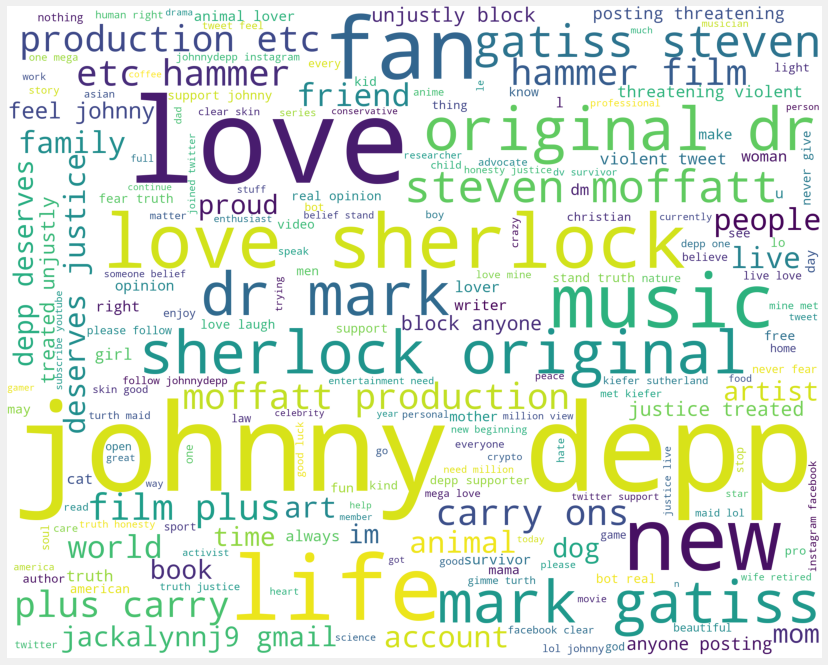

In [20]:
wordcloud_draw(df['clean_tweets'], color='white')

In [21]:
##checking least frequent words in case of typos,etc
freq = pd.Series(' '.join(df['clean_tweets']).split()).value_counts()
less_freq = list(freq[freq ==1].index)
less_freq

['heaped',
 'footy',
 'libertad',
 '36',
 'salvador',
 'cantante',
 'actriz',
 'terry',
 'perfectly',
 'medtwitter',
 'johhny',
 'letras',
 'az',
 'teatro',
 'justicia',
 'disc',
 'pratchet',
 'vegetarian',
 'flip',
 'superheroes',
 'recommendation',
 'result',
 'destiny',
 'mim',
 'high',
 'b694',
 'dick',
 'nisd',
 'bloody',
 'prawn',
 '1973',
 'exposed',
 'german',
 'jw',
 'sent',
 'group',
 'empathy',
 'sunday',
 'colorado',
 'forgotten',
 'pentatonix',
 'gmt',
 'mario',
 'sims',
 'drizzt',
 'blog',
 'gone',
 'perpetuated',
 'chronicle',
 'inspired',
 'mattaponi',
 'bisexual',
 'relation',
 '22johnny',
 'fail',
 'diyer',
 'sem',
 'spencer',
 'flash',
 'dyin',
 'juice',
 'mamie',
 'riley',
 'contender',
 'quest',
 'jewel',
 'daylight',
 'gwai',
 'maman',
 'tear',
 'dozen',
 'anger',
 'kdrama',
 'rveuse',
 'imperfect',
 'heterosexual',
 'passionne',
 'gotta',
 'hki',
 'trauma',
 'fanpage',
 'thrifting',
 'winning',
 'award',
 'crafter',
 'motion',
 'hurti',
 'budget',
 'tiny',
 'tast

In [22]:
#seeing most common words in case we missed any stop words
df['temp_list'] = df['clean_tweets'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [23]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### Performing Sentiment Analysis

In [24]:
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

In [25]:
df['Subjectivity'] = df['clean_tweets'].apply(getSubjectivity)
df['Polarity'] = df['clean_tweets'].apply(getPolarity)

In [26]:
df

username                                        description  \
1     TruthWeaponized  Proud to be blocked by Michele Dauber for tell...   
4           momofkami  #Tennessee #democrat #retailworker #Mom #BSW #...   
5           CodeDebYT  🎙Celebrity News and Gossip! | Help me get to 1...   
6        KellyDeSando  Accounting & Finance Professional who also fos...   
7        perrymcinnis  All actions, thoughts, and words of hate, now ...   
...               ...                                                ...   
1994   Onlyjennamarie              Dog sitter, and big animal lover!! 💋🥰   
1995    justicefanacc  MSc Psychology postgrad, queer feminist, autis...   
1996      SoberBlanco  Web Designer @sober_agency | Premium Customize...   
1997        terri0928   Lifetime Fan of Truth and Justice For ALL People   
1999         hydeedee  Rocking my 60's 🥰 loving my life. mad cat woma...   

                      location  following  followers  totaltweets  \
1                          nan          6         15         1111   
4     Tennessee, United States       1725        345        11244   
5                          nan        272        380        10049   
6                   Tucson, AZ        667        155         1933   
7                          nan         81         20          521   
...                        ...        ...        ...          ...   
1994                       nan          4          3           66   
1995                       nan        132         41          760   
1996                       nan       3297       5836        33934   
1997                       nan         52         27         1975   
1999            United Kingdom        576        352         5377   

      retweetcount                                       clean_tweets  \
1                0  proud blocked michele dauber telling get bully...   
4               81                                                      
5                0      celebrity news gossip help get 10k tik tok tt   
6              787    accounting finance professional also foster dog   
7                0       action thought word hate become decided fate   
...            ...                                                ...   
1994             2                        dog sitter big animal lover   
1995           293    msc psychology postgrad queer feminist autistic   
1996             4  web designer sober_agency premium customized s...   
1997           787                  lifetime fan truth justice people   
1999             4  rocking 60 loving life mad cat woman hymer b69...   

                                              temp_list  Subjectivity  \
1     [proud, blocked, michele, dauber, telling, get...        1.0000   
4                                                    []        0.0000   
5     [celebrity, news, gossip, help, get, 10k, tik,...        0.0000   
6     [accounting, finance, professional, also, fost...        0.1000   
7     [action, thought, word, hate, become, decided,...        0.5000   
...                                                 ...           ...   
1994                  [dog, sitter, big, animal, lover]        0.1000   
1995  [msc, psychology, postgrad, queer, feminist, a...        0.2000   
1996  [web, designer, sober_agency, premium, customi...        0.3000   
1997            [lifetime, fan, truth, justice, people]        0.0000   
1999  [rocking, 60, loving, life, mad, cat, woman, h...        0.4875   

      Polarity  
1      0.80000  
4      0.00000  
5      0.00000  
6      0.10000  
7     -0.35000  
...        ...  
1994   0.00000  
1995  -0.20000  
1996   0.20000  
1997   0.00000  
1999  -0.00625  

[1503 rows x 11 columns]

In [27]:
##replacing blanks as NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

In [28]:
df.count()

username        1503
description     1503
location        1501
following       1503
followers       1503
totaltweets     1503
retweetcount    1503
clean_tweets    1354
temp_list       1503
Subjectivity    1503
Polarity        1503
dtype: int64

In [29]:
##removing NaN
df = df[df['clean_tweets'].notna()]

In [30]:
df['clean_tweets'] = df['clean_tweets'].astype(str)

In [31]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return "Neutral"
    else:
        return 'Positive'

In [32]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)

### Visualising our results

<AxesSubplot:>

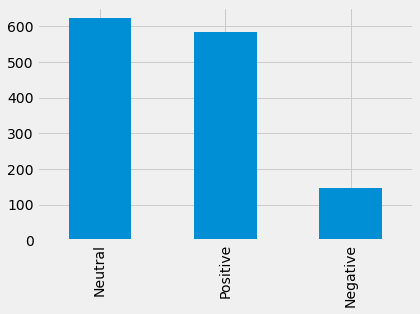

In [33]:
df['Sentiment'].value_counts().plot(kind='bar')

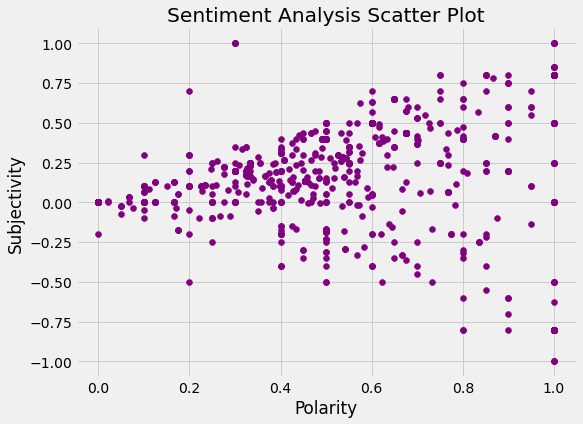

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(x='Subjectivity', y='Polarity', data=df, color='Purple')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

array([[<AxesSubplot:title={'center':'Subjectivity'}>,
        <AxesSubplot:title={'center':'Polarity'}>]], dtype=object)

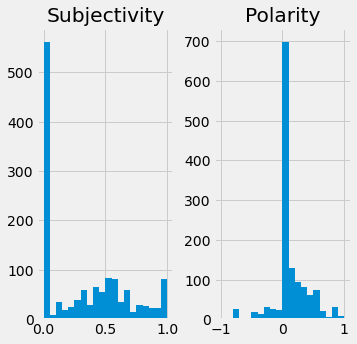

In [35]:
df[["Subjectivity", "Polarity"]].hist(bins=20, figsize=(5, 5))

In [36]:
data = df[['clean_tweets','Sentiment']]

In [37]:
pos = data[data['Sentiment'] == 'Positive']
pos = pos['clean_tweets']
neg = data[data['Sentiment'] == 'Negative']
neg = neg['clean_tweets']
neu = data[data['Sentiment'] == 'Neutral']
neu = neu['clean_tweets']

Positive words


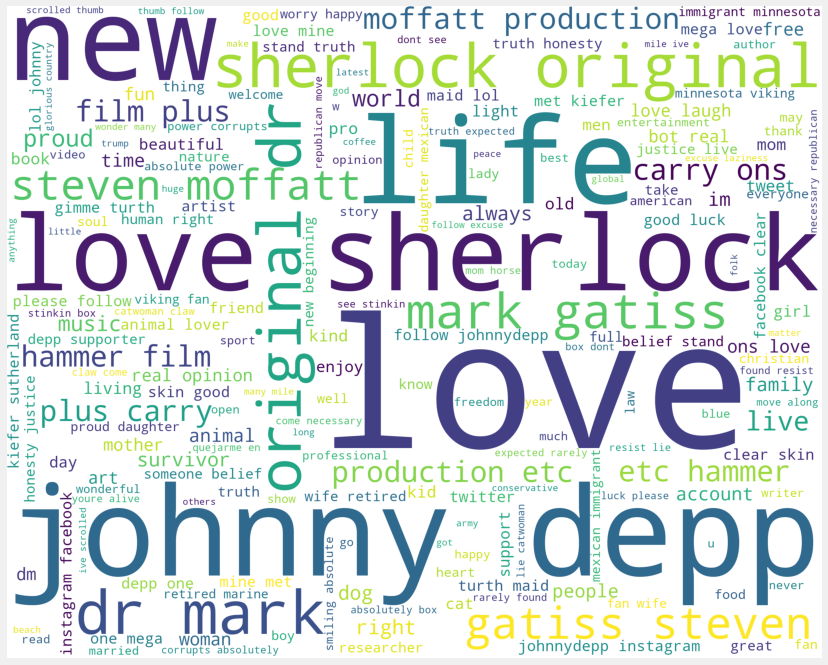

Negative words


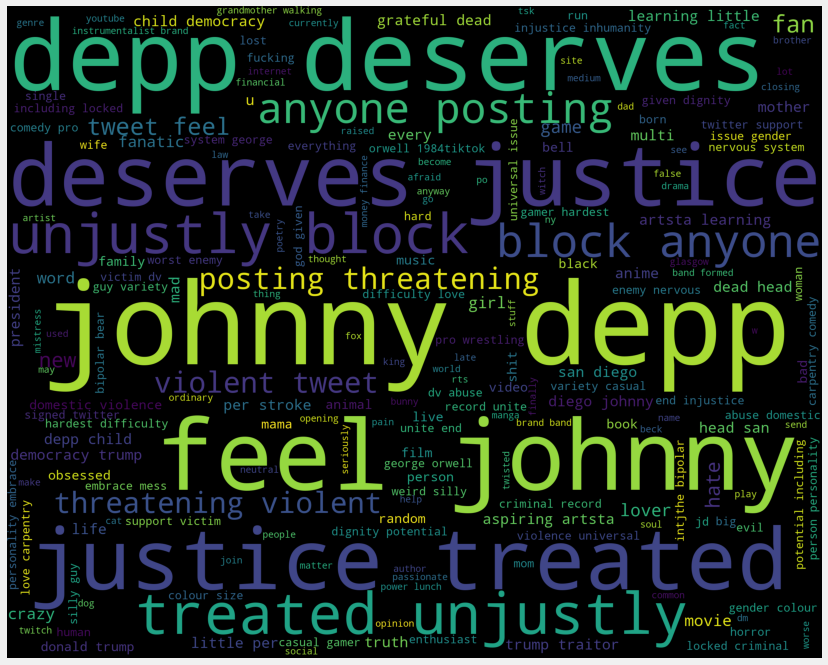

In [38]:
print("Positive words")
wordcloud_draw(pos,'white')
print("Negative words")
wordcloud_draw(neg)

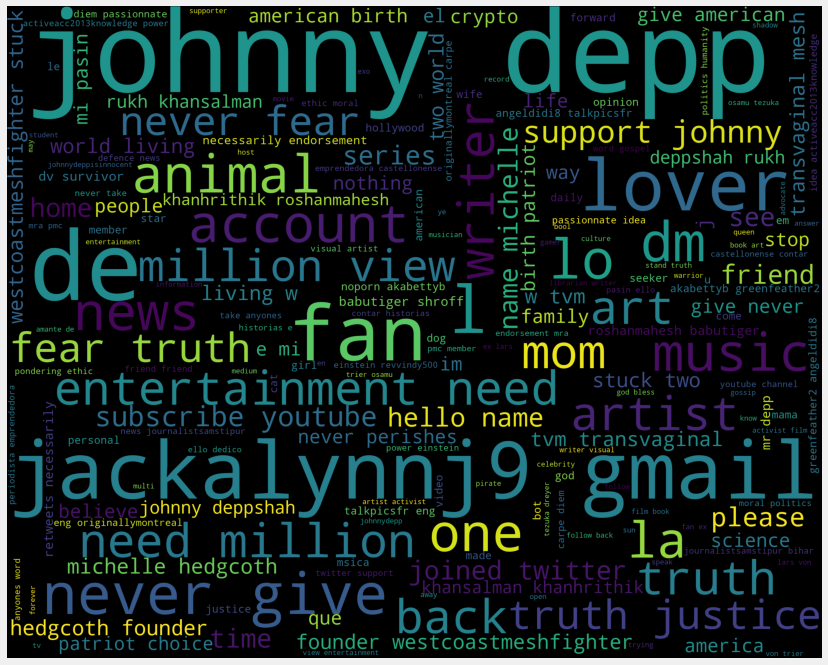

In [39]:
wordcloud_draw(neu)

### Conclusion

Overall it is safe to assume that the general sentiment towards Johnny Depp is positive and that the twitter population considers him a favorable figure